In [5]:
import requests
import os

#Download Tesseract from github repo
r = requests.get("https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata", stream=True)

# Define the directory and filename
file_path = "usr/share/tesseract-ocr/4.00/ind.traineddata"
directory = os.path.dirname(file_path)

# Create the directory if it doesn't exist
os.makedirs(directory, exist_ok=True)

#Writing data to file
with open(file_path, "wb") as f:
  for block in r.iter_content(1024):
    if block:
      f.write(block)

In [6]:
#Installing necessary dependencies for character recognition
!apt install tesseract-ocr libtesseract-dev libmagickwand-dev

from IPython.display import HTML, clear_output
clear_output()

In [7]:
#Installing Pytesseract and OpenCV
!pip install Pytesseract wand opencv-python
clear_output()

In [9]:
from PIL import Image #to load and visualize the image
import pytesseract #for text extraction from image
import cv2 #for image preprocessing
import numpy as np #for numerical computations
from pytesseract import Output #to log text outputs
import re

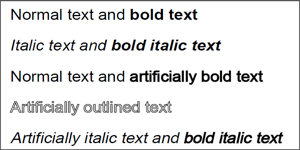

In [10]:
#Reading Image from a URL
image = Image.open(requests.get('https://i.stack.imgur.com/pbIdS.png', stream=True).raw)
image = image.resize((300,150))
image.save('sample.png')
image

In [13]:
#Extracting Text from Image
custom_config = r'-l eng --oem 3 --psm 6'
text = pytesseract.image_to_string(image, config=custom_config)
print(text)

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text



In [15]:
#Cleaning the Extracted Text of Unwanted Characters
try:
  text=pytesseract.image_to_string(image, lang="eng")
  unwanted_characters = "()%$#*&@)-_+=!~^{}"
  new_string = text
  for character in unwanted_characters:
    new_string = new_string.replace(character, "")
  print(new_string)
except:
  print ("Error (%s)." % e)

 

 

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text

 

 



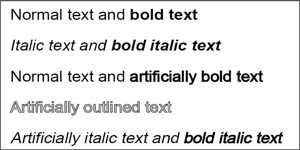

In [18]:
#for complex images using OpenCV
def get_grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = get_grayscale(image)
Image.fromarray(gray)

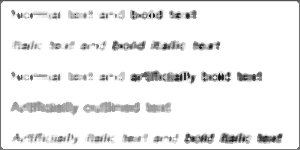

In [22]:
#removing noise from an image
def noise_removal(image):
  return cv2.medianBlur(image,5)
no_noise = noise_removal(gray)
Image.fromarray(no_noise)

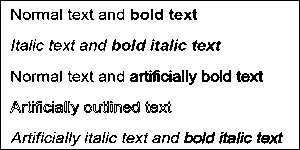

In [26]:
#applying threshold to the image
def threshold(image):
  return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = threshold(gray)
Image.fromarray(thresh)

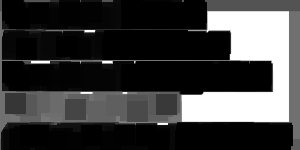

In [28]:
#Image Erosion
def erode(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.erode(image, kernel, iterations = 5)
eroded = erode(gray)
Image.fromarray(eroded)

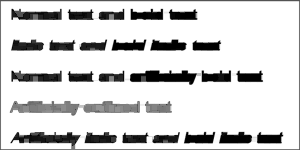

In [31]:
#Morphological Image Tranformation
def open_morph(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
morphed = open_morph(gray)
Image.fromarray(morphed)

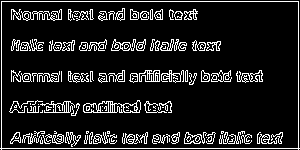

In [32]:
#Image Edge Detection
def canny(image):
  return cv2.Canny(image, 100, 200)
canny = canny(gray)
Image.fromarray(canny)

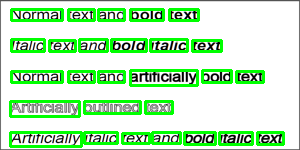

In [33]:
# Create a copy of the original image to draw rectangles on
image_with_rectangles = np.array(image.copy())

# Get bounding box data for each text
data = pytesseract.image_to_data(image, output_type=Output.DICT)

n_boxes = len(data['level'])
for i in range(n_boxes):
    # Check if the confidence is above a certain threshold and text is detected
    if int(data['conf'][i]) > 60 and data['text'][i].strip() != '':
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        # Draw a rectangle around the text
        cv2.rectangle(image_with_rectangles, (x, y), (x + w, y + h), (0, 255, 0), 2) # Green rectangle with thickness 2

# Display the image with rectangles
Image.fromarray(image_with_rectangles)